In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from google.colab.patches import cv2_imshow
import os

In [8]:

os.environ['KAGGLE_USERNAME'] = "manishgour70" # username from the json file
os.environ['KAGGLE_KEY'] = "d639680108dbe9be38ed3646dc231149" # key from the json file
!kaggle competitions download -c dogs-vs-cats # api copied from kaggle

 98% 265M/271M [00:06<00:00, 58.1MB/s]
100% 271M/271M [00:06<00:00, 43.8MB/s]
 98% 531M/543M [00:04<00:00, 121MB/s]
100% 543M/543M [00:05<00:00, 111MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 89.4MB/s]


In [0]:
!unzip -qq train.zip

In [10]:
import os
print(os.listdir("."))

['.config', '__MACOSX', 'train', 'sampleSubmission.csv', 'test1.zip', 'train.zip', 'Cat_Dog_data', 'Cat_Dog_data.zip', 'sample_data']


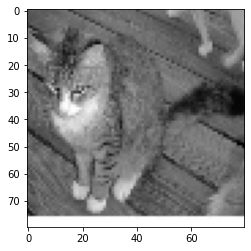

In [11]:
main_dir = "."
train_dir = "train/"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [0]:
# datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    # train_it = datagen.flow_from_directory('data/train/',
        # class_mode='binary', batch_size=64, target_size=(200, 200))
    # test_it = datagen.flow_from_directory('data/test/',
        # class_mode='binary', batch_size=64, target_size=(200, 200))
    # fit model
    # history1 = model1.fit_generator(train_it, steps_per_epoch=len(train_it),
        # validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=0)
    # evaluate model
    # _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    # print('> %.3f' % (acc * 100.0))
    # learning curves
    # summarize_diagnostics(history)

X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)

In [0]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [0]:
X = X/255.0

In [18]:

    # model = define_model()
    # create data generator
    # datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    # train_it = datagen.flow_from_directory('data/train/',
    #     class_mode='binary', batch_size=64, target_size=(200, 200))
    # test_it = datagen.flow_from_directory('data/test/',
    #     class_mode='binary', batch_size=64, target_size=(200, 200))
    # fit model
    # history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
    #     validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=0)
    # evaluate model
    # _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    # print('> %.3f' % (acc * 100.0))
    #  learning curves
    # summarize_diagnostics(history)


    # model = Sequential()
    # model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    # model.add(MaxPooling2D((2, 2)))
    # model.add(Flatten())
    # model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    # model.add(Dense(1, activation='sigmoid'))
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    # model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    # return model

    
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 78, 78, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1327168   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [17]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 245s 392ms/step - loss: 0.6484 - accuracy: 0.6127 - val_loss: 0.5802 - val_accuracy: 0.6952
Epoch 2/10
625/625 [==============================] - 245s 392ms/step - loss: 0.5508 - accuracy: 0.7232 - val_loss: 0.5304 - val_accuracy: 0.7332
Epoch 3/10
625/625 [==============================] - 244s 391ms/step - loss: 0.5010 - accuracy: 0.7609 - val_loss: 0.4915 - val_accuracy: 0.7576
Epoch 4/10
625/625 [==============================] - 244s 391ms/step - loss: 0.4699 - accuracy: 0.7804 - val_loss: 0.4786 - val_accuracy: 0.7678
Epoch 5/10
625/625 [==============================] - 244s 390ms/step - loss: 0.4442 - accuracy: 0.7937 - val_loss: 0.4798 - val_accuracy: 0.7774
Epoch 6/10
625/625 [==============================] - 244s 390ms/step - loss: 0.4127 - accuracy: 0.8113 - val_loss: 0.4616 - val_accuracy: 0.7856
Epoch 7/10
625/625 [==============================] - 246s 393ms/step - loss: 0.3784 - accuracy: 0.8288 - val_loss: 0.4590 -

Text(0.5, 1.0, 'Training and validation loss')

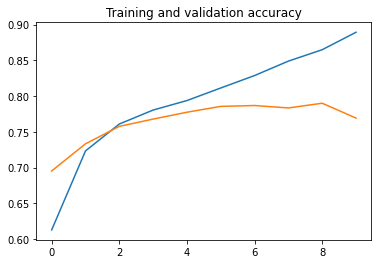

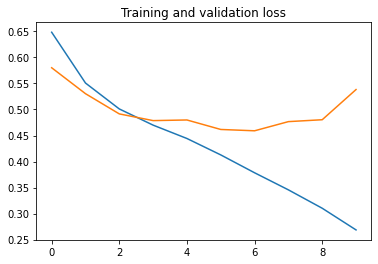

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [0]:
!unzip -qq test1.zip

In [0]:
train_dir = "test1/"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

In [0]:
predictions = model.predict(X_test)


In [0]:
predicted_val = [int(round(p[0])) for p in predictions]

In [25]:
print(predicted_val)

[1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 